# Central Limit Demo
Alex Weech
ATMOS 6040/ Spring 2019
January 24 2019
ATMOS 6040: Environmental Statistics
Alex Weech

Download this notebook and all images and data by downloading the ZIP file from GitHub, or use the git command:

git clone https://github.com/weech/ATMOS_5040_2019.git
Note: Windows users will have to install git for Windows and execute the git command from the PowerShell.

In [1]:
using Statistics
using Printf
using PyPlot

In [2]:
print("enter the number of sides on the die (6 or 10 or...): ")
sides = parse(Int, readline())
print("enter the sample size (number of dice to roll at the same time): ")
dice = parse(Int, readline())
print("enter the number of rolls: ")
rolls = parse(Int, readline())

enter the number of sides on the die (6 or 10 or...): stdin> 6
enter the sample size (number of dice to roll at the same time): stdin> 20
enter the number of rolls: stdin> 500


500

In [3]:
rd = rand(rolls, dice)

500×20 Array{Float64,2}:
 0.905081   0.379954    0.518648   …  0.744828   0.613343  0.0782976
 0.245843   0.0605602   0.545982      0.224547   0.591506  0.721074 
 0.386881   0.905582    0.905295      0.206412   0.506495  0.018555 
 0.830662   0.929306    0.0690413     0.180852   0.152338  0.729477 
 0.818036   0.0437378   0.241382      0.256203   0.890194  0.13502  
 0.581495   0.701921    0.412924   …  0.813404   0.235882  0.171923 
 0.455317   0.308956    0.813448      0.8851     0.237061  0.080224 
 0.0302763  0.73482     0.0805669     0.366049   0.40785   0.0649514
 0.47983    0.0343074   0.463092      0.41839    0.321107  0.465409 
 0.148727   0.294117    0.382088      0.181609   0.278813  0.366143 
 0.370383   0.0637053   0.0133615  …  0.739925   0.717996  0.422966 
 0.873772   0.614897    0.258291      0.524213   0.341483  0.56889  
 0.134669   0.277508    0.426125      0.737788   0.635804  0.30623  
 ⋮                                 ⋱                                
 0.782631

In [4]:
rdd = ceil.(sides .* rd)

500×20 Array{Float64,2}:
 6.0  3.0  4.0  5.0  4.0  5.0  6.0  4.0  …  2.0  3.0  2.0  2.0  5.0  4.0  1.0
 2.0  1.0  4.0  1.0  5.0  5.0  6.0  4.0     4.0  6.0  1.0  5.0  2.0  4.0  5.0
 3.0  6.0  6.0  4.0  5.0  5.0  4.0  6.0     1.0  3.0  2.0  4.0  2.0  4.0  1.0
 5.0  6.0  1.0  2.0  2.0  2.0  4.0  5.0     1.0  6.0  3.0  1.0  2.0  1.0  5.0
 5.0  1.0  2.0  3.0  3.0  2.0  6.0  3.0     6.0  3.0  1.0  2.0  2.0  6.0  1.0
 4.0  5.0  3.0  2.0  2.0  2.0  2.0  3.0  …  3.0  1.0  4.0  2.0  5.0  2.0  2.0
 3.0  2.0  5.0  5.0  2.0  4.0  4.0  5.0     3.0  5.0  5.0  6.0  6.0  2.0  1.0
 1.0  5.0  1.0  5.0  6.0  5.0  3.0  3.0     2.0  6.0  3.0  3.0  3.0  3.0  1.0
 3.0  1.0  3.0  4.0  5.0  6.0  4.0  4.0     5.0  1.0  1.0  6.0  3.0  2.0  3.0
 1.0  2.0  3.0  4.0  2.0  4.0  2.0  3.0     1.0  6.0  4.0  5.0  2.0  2.0  3.0
 3.0  1.0  1.0  2.0  4.0  1.0  1.0  4.0  …  1.0  3.0  5.0  4.0  5.0  5.0  3.0
 6.0  4.0  2.0  2.0  1.0  2.0  2.0  4.0     6.0  3.0  2.0  6.0  4.0  3.0  4.0
 1.0  2.0  3.0  2.0  4.0  6.0  6.0  2.0

In [5]:
#define the population as all the possible rolls
pop = reshape(rdd, length(rdd))
#compute std of population
pstd = std(pop);

In [6]:
#compute the sum and mean of the samples
if dice > 1
    ss = sum(rdd, dims=2)
    sm = mean(rdd, dims=2)
else
    ss = rdd
    sm = rdd 
end
    
mean_sum = mean(ss)
mean_mean = mean(sm)
println(mean_sum, mean_mean)

#compute the std of the sample means 
sstd = std(sm, corrected=false)
# does the central limit theorem work? is the following close to sstd?
check = pstd / sqrt(dice)
@printf("population standrd deviation= %.1f\n", pstd)
@printf("standard deviation of sample means= %.1f\n", sstd)
@printf("check for central limit theorem= %.1f\n", check)


70.763.5380000000000003
population standrd deviation= 1.7
standard deviation of sample means= 0.4
check for central limit theorem= 0.4


In [7]:
#does the central limit theorem work? is the following close to sstd

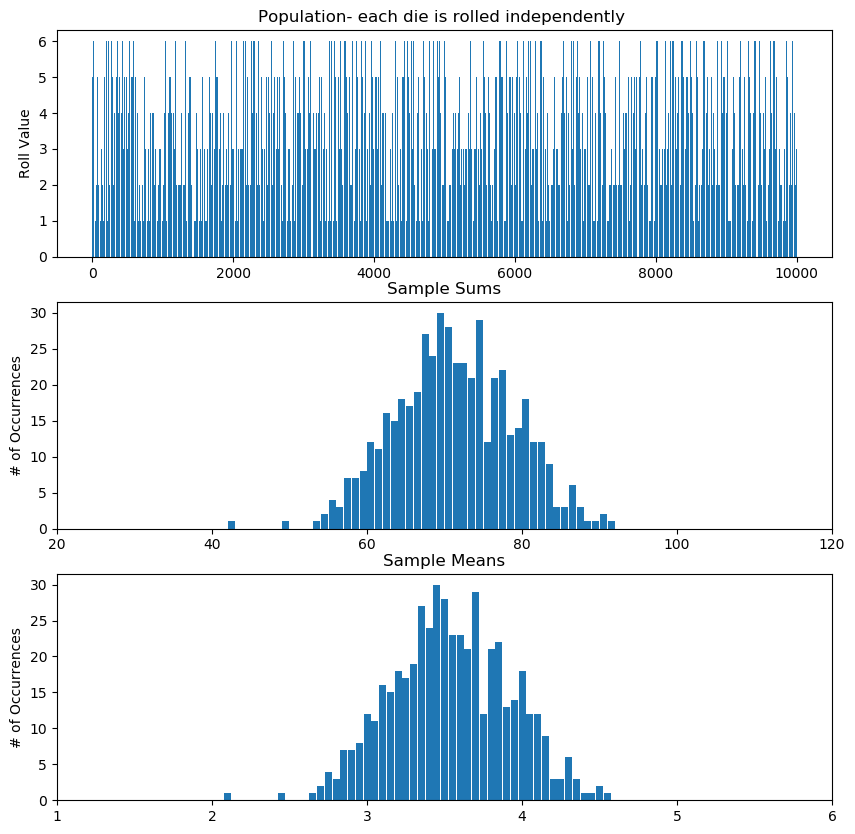

PyObject Text(0.5, 1.0, 'Sample Means')

In [8]:
fig,  (ax1, ax2, ax3) = subplots(3, 1,figsize=(10, 10))
x = 0:rolls*dice-1
ax1[:bar](x, pop)
ax1[:set_ylabel]("Roll Value")
ax1[:set_title]("Population- each die is rolled independently ")
x2 = 1:sides*dice-1

ax2[:hist](ss, x2, rwidth=0.9)
ax2[:set_xlim](dice, sides*dice)
ax2[:set_ylabel]("# of Occurrences")
ax2[:set_title]("Sample Sums")

x3 = 1-.5*1/dice:1/dice:sides+.5*1/dice
ax3[:hist](sm, x3, rwidth=0.9)
ax3[:set_xlim](1, sides)
ax3[:set_ylabel]("# of Occurrences")
ax3[:set_title]("Sample Means")